In [1]:
using Plots
using Gen

In [2]:
x = range(20, 100, length=100)
y=range(0,stop=0.0,length=100)
#y = range(0,100, length=100)
z=range(0,stop=0.0,length=100)

0.0:0.0:0.0

In [213]:
x_lim = 200
y_lim = 200
z_lim = 10

10

In [220]:
@gen function rail_model_new(xstart::Float64, xend::Float64)
    #n = length(xs)
    xstart = @trace(normal(xstart, 1), :xstart)
    xend = @trace(normal(xend,1), :xend)
    # We begin by sampling a slope and intercept for the line.
    # Before we have seen the data, we don't know the values of
    # these parameters, so we treat them as random choices. The
    # distributions they are drawn from represent our prior beliefs
    # about the parameters: in this case, that neither the slope nor the
    # intercept will be more than a couple points away from 0.
    slope = @trace(normal(0, 1), :slope)
    intercept = @trace(normal(0, 1), :intercept)
    
    xcamera = @trace(normal(50., 10), :xcamera)
    ycamera = @trace(normal(50., 10), :ycamera)
    
    # Given the slope and intercept, we can sample y coordinates
    # for each of the x coordinates in our input vector.
    #for (i, x) in enumerate(xs)
     #   @trace(normal(slope * x + intercept, 0.1), (:r1, i))
      #  @trace(normal(slope * x + intercept+2, 0.1), (:r2, i))
    #end
    
    # The return value of the model is often not particularly important,
    # Here, we simply return n, the number of points.
    return 1
end;

In [217]:
function render_trace(trace)
    
    # Pull out xs from the trace
    #xs = get_args(trace)[1]
    
    #xmin = minimum(xs)
    #xmax = maximum(xs)
    #y_r1 = [trace[(:r1, i)] for i=1:length(xs)]
    #y_r2 = [trace[(:r2, i)] for i=1:length(xs)]
    xs = [trace[:xstart],trace[:xend] ]
    
    # Pull out slope and intercept from the trace
    slope = trace[:slope]
    intercept = trace[:intercept]
    z =range(0.,stop=0.0,length=length(xs))
    # Draw the line
    plot = plot3d([xs, xs], [((xs.*slope) .+intercept), ((xs .* slope) .+ intercept .+ 2)] , [z, z],
        camera=(trace[:xcamera], trace[:ycamera]), legend=false)
        #xlim = (0, x_lim),
        #ylim = (0, y_lim),
        #zlim = (0, z_lim))
    return plot
end;

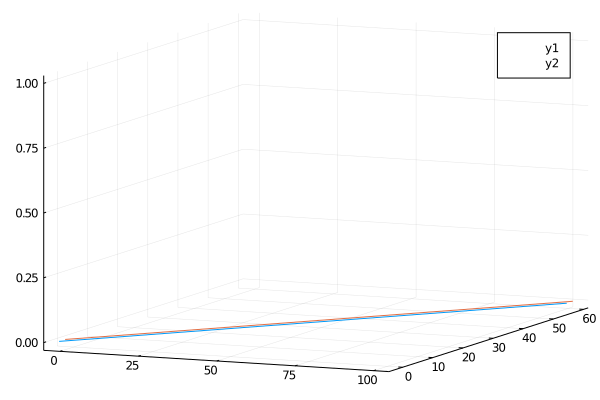

In [35]:
trace1 = Gen.simulate(rail_model_new, (0.0,100.,));
plot = render_trace(trace1);
plot

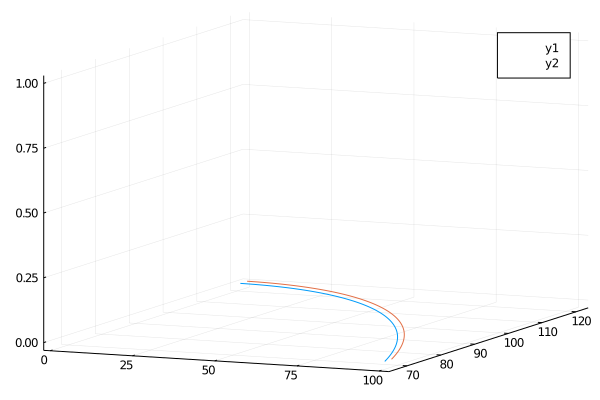

In [123]:
x = range(1., 100., length=100)
z = range(0., 0., length=100)
r= 120.
f = sqrt.(r^2 .- (x .^ 2))
g = sqrt.(r^2 .- (x .^ 2))
plot3d([x, x],[f, f .+ 2] , [z, z],
#xlim = (0, 100),
 #   ylim = (0, 100),
  #  zlim = (0, 10),
    camera=(30,30))

In [223]:
@gen function rail_curve(xstart::Float64, xend::Float64, radius::Float64)
    #n = length(xs)
    xs = @trace(normal(xstart, 1), :xstart)
    xe = @trace(normal(xend,1), :xend)
    slope = @trace(normal(0, 1), :slope)
    yradius = @trace(normal(radius, 1), :yradius)
    xcamera = @trace(normal(50., 10), :xcamera)
    ycamera = @trace(normal(50., 10), :ycamera)
    #xs = @trace((range(xs, xe, length=10)), :x)

    
    # We begin by sampling a slope and intercept for the line.
    # Before we have seen the data, we don't know the values of
    # these parameters, so we treat them as random choices. The
    # distributions they are drawn from represent our prior beliefs
    # about the parameters: in this case, that neither the slope nor the
    # intercept will be more than a couple points away from 0.
    
    # Given the slope and intercept, we can sample y coordinates
    # for each of the x coordinates in our input vector.
    
    # The return value of the model is often not particularly important,
    # Here, we simply return n, the number of points.
    return 1
end;

In [224]:
function render_trace_curves(trace)
    
    # Pull out xs from the trace
    #xs = get_args(trace)[1]
    
    #xmin = minimum(xs)
    #xmax = maximum(xs)
    #y_r1 = [trace[(:r1, i)] for i=1:length(xs)]
    #y_r2 = [trace[(:r2, i)] for i=1:length(xs)]
    x = range(trace[:xstart], trace[:xend], length=10)
    # Pull out slope and intercept from the trace
    z =range(0.,stop=0.0,length=length(x))
    # Draw the line
    f = (sqrt.(trace[:yradius]^2 .- (x .^ 2))) .* trace[:slope]
    plot = plot3d([x, x], [f, f .+ 2] , [z, z],
        camera=(trace[:xcamera], trace[:ycamera]), legend=false)
        #xlim = (0, x_lim),
        #ylim = (0, y_lim),
        #zlim = (0, z_lim))
    return plot
end;

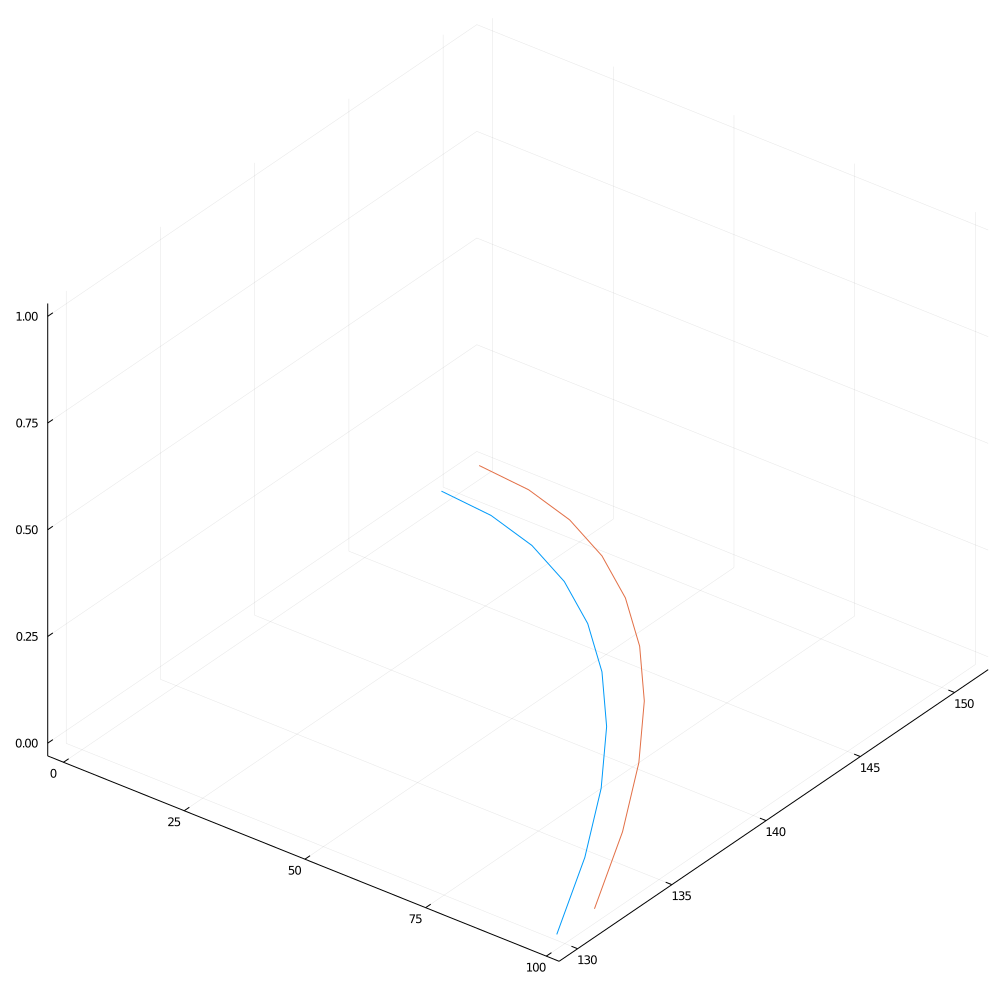

In [226]:
trace1 = Gen.simulate(rail_curve, (0.0, 100., 200.,));
plot = render_trace_curves(trace1);
plot

In [165]:
@gen function combined_model(xstart::Float64, xend::Float64, radius::Float64)
    if @trace(bernoulli(0.5), :is_line)
        @trace(rail_model_new(xstart, xend))
    else
        @trace(rail_curve(xstart, xend, radius))
    end
end;

function render_combined(trace)
    if trace[:is_line]
        render_trace(trace)
    else
        render_trace_curves(trace)
    end
end;

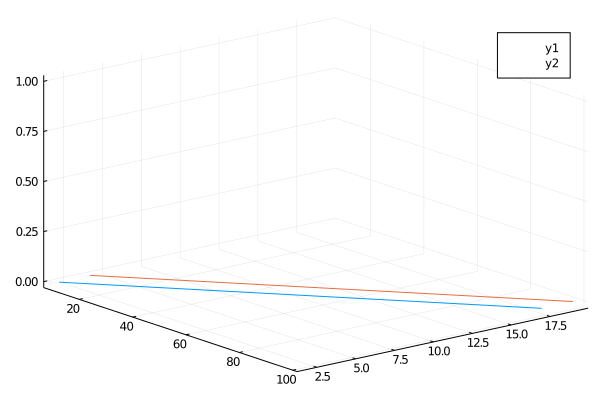

In [169]:
trace = Gen.simulate(combined_model, (10., 100., 150.,));
plot = render_combined(trace);
plot

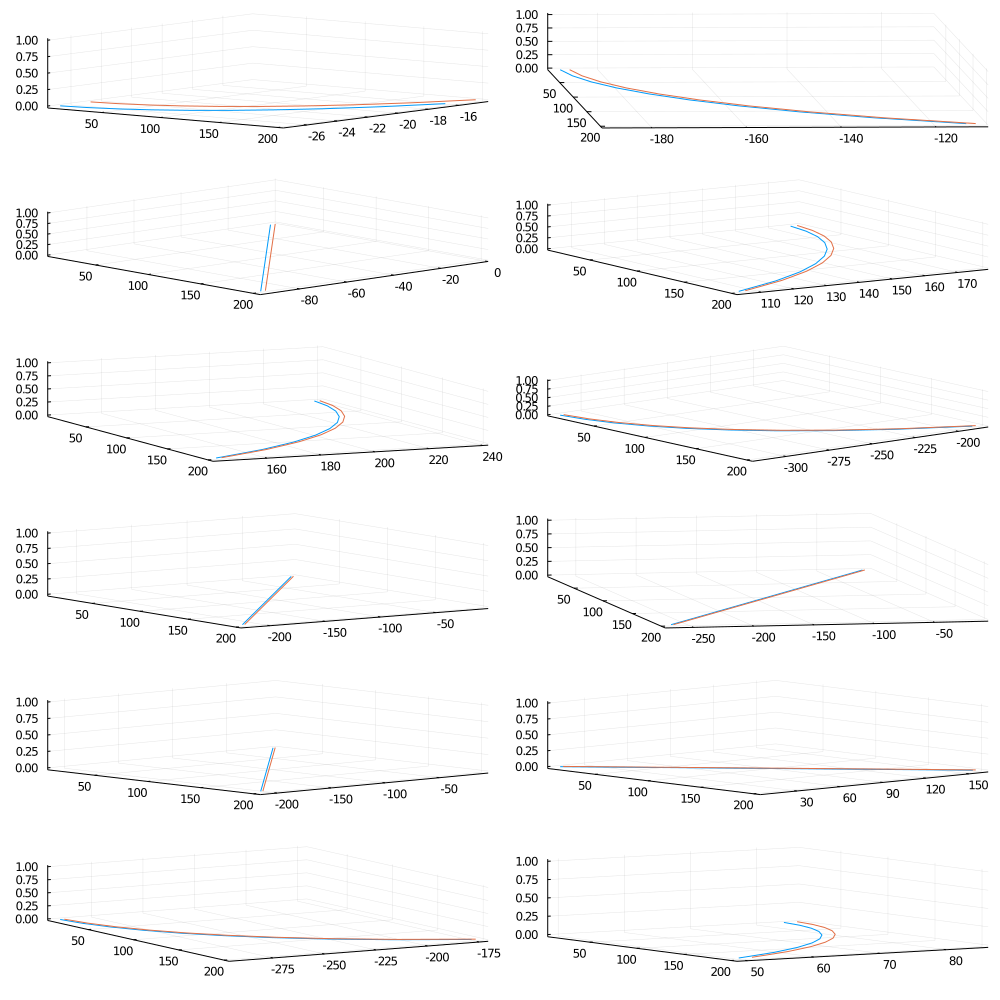

In [228]:
plot_array = Array{Any}(nothing, 12)
traces = [Gen.simulate(combined_model, (10., 200., 250.,)) for _=1:12];

for (i, trace) in enumerate(traces)
    plot_array[i] = render_combined(trace)
end
gr()
gr(size=(1000,1000))
plot3d(plot_array..., layout=(6,2))
